# Storing and loading plots

pltfront provides facilities to store and load `Plot` objects. This is most useful when tweaking stylistic features while keeping the data unmodified.

## Store a plot

Let's generate a simple plot. We can store the `Plot` instance using the `store` method.
The `store` method saves an encrypted `.pkl` binary file containing the entire `Plot` instance; for this reason, a password must be provided by the user, either when prompted. 
> Note: `store` does **not** save the password to file. Forgetting the password renders the pickled file unreadable.

In [11]:
import os
from pltfront.plot import Plot
import numpy as np

# Output directory
out = os.path.join(os.getcwd(), 'out')
# Generate the data set
xs = [np.linspace(0., 1.25), np.linspace(0., 1.25)]
ys = [np.exp(xs[0]), np.exp(2*xs[1])]
kinds = ['line', 'scatter']
labels = ['$e^x$', '$e^{2x}$']

# Plot
plotting = Plot(out=out)
_ = plotting.plot(xs, ys, kind=kinds, label=labels, legend=True, show=True)

# Store plot
plotting.silent = False # Prompt user for password
plotting.store()

 ········


Alternatively, when the `silent` class attribute is set to `True`, we can set the password in a cleartext file called `/output/pkl/passwd.pwd`.

In [14]:
# Generate password file example
os.makedirs(os.path.join(out, 'pkl'), exist_ok=True)
with open(os.path.join(out, 'pkl/passwd.pwd'), 'w') as f:
    f.write('123456')

# Store plot with password file
plotting.silent = True # Don't prompt user for password and read from file
plotting.store()

## Load a plot

We can load the plot we just generated and saved using the `load` method. Setting the `silent` attribute leads to the same behavior seen in `store`.

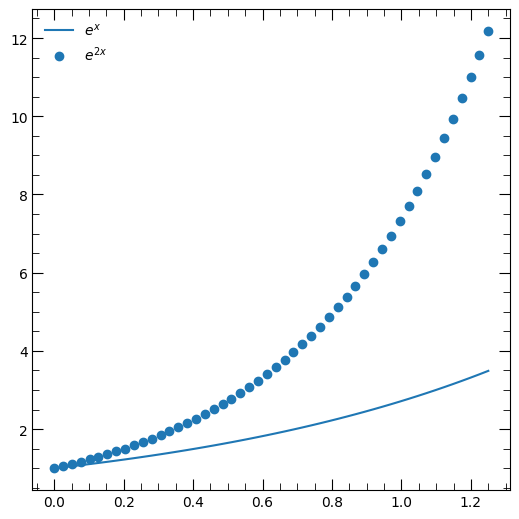

In [16]:
# Load plot with password file
fig, _ = plotting.load()
plotting.show(fig=fig)